# Gooseberry Falls Structural Analysis

In [1]:
import sys
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import mplstereonet
%matplotlib inline

# Combined measurements from all flows

In [2]:
# import structural measurements
ALL_planes = pd.read_csv('ALL_plane.csv')
ALL_planes['strat'] = pd.Series(index=ALL_planes.index, name='strat')
GB_strat = pd.read_csv('GB_strat.csv', skiprows=4, usecols=['THICKNESS', 'LITHOLOGY', 'NOTES', 'STRAT_EC'])

In [3]:
ALL_planes.head()

,strike,dip_dir,dip,dec_corr,unit,type,notes,strat
0,6,96,8,n,GB3,flow banding,flowtop,NaN
1,11,101,9,n,GB3,flow banding,flowtop,NaN
2,25,115,9,n,GB3,flow banding,flowtop,NaN
3,14,104,7,n,GB3,flow banding,NaN,NaN
4,38,128,7,n,GB3,flow banding,questionable measurement,NaN


In [4]:
flow_strat = GB_strat.ix[GB_strat.NOTES.str.startswith('GB')==True]

In [5]:
flow_strat.head()

,THICKNESS,LITHOLOGY,NOTES,STRAT_EC
0,3.2,m,GB1,3.2
2,0.9,m,GB2,14.6
7,1.4,mv,GB3,21.0
10,2.3,v,GB4 (possibly continuous with GB3),26.7
12,1.3,mv,GB5,42.3


In [6]:
for n in range(len(ALL_planes)):
    ALL_planes['strat'][n] = flow_strat.ix[flow_strat.NOTES.str.startswith(str(ALL_planes['unit'][n]))]['STRAT_EC'].tolist()[0]

In [7]:
ALL_planes

,strike,dip_dir,dip,dec_corr,unit,type,notes,strat
0,6,96,8,n,GB3,flow banding,flowtop,21.00
1,11,101,9,n,GB3,flow banding,flowtop,21.00
2,25,115,9,n,GB3,flow banding,flowtop,21.00
3,14,104,7,n,GB3,flow banding,NaN,21.00
4,38,128,7,n,GB3,flow banding,questionable measurement,21.00
5,36,126,8,n,GB3,flow banding,questionable measurement,21.00
6,26,116,8,n,GB4,flow banding,NaN,26.70
7,39,129,12,n,GB4,flow banding,questionable measurement,26.70
8,34,124,13,n,GB4,flow banding,NaN,26.70
9,20,110,15,n,GB4,flow banding,NaN,26.70


In [8]:
GB_sites = ALL_planes['unit'].unique().tolist()
GB_site_strat = {}
for site in GB_sites:
    GB_site_strat[site] = int(ALL_planes.ix[ALL_planes['unit']==site]['strat'].tolist()[0])

In [9]:
GB_sites

['GB3',
 'GB4',
 'GB6',
 'GB7',
 'GB9',
 'GB10',
 'GB11',
 'GB12',
 'GB13',
 'GB14',
 'GB15',
 'GB21',
 'GB22',
 'GB23',
 'GB28',
 'GB32']

In [10]:
ALL_planes['pole_trend'] = pd.Series((ALL_planes['dip_dir']+180)%360, index=ALL_planes.index)
ALL_planes['pole_plunge'] = pd.Series(90-ALL_planes['dip'], index=ALL_planes.index)

In [11]:
def calc_pole_mean(dataframe):
    poles = ipmag.make_di_block(dataframe['pole_trend'],dataframe['pole_plunge'])
    poles_mean = pmag.fisher_mean(poles)
    return poles_mean
ALL_poles_mean = calc_pole_mean(ALL_planes)

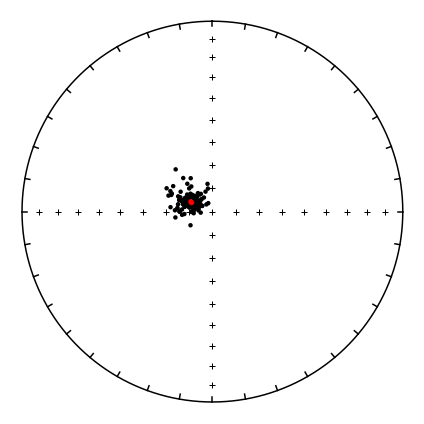

In [12]:
plt.figure(figsize=(6,6), num=1)
ipmag.plot_net(1)
# dec, inc = ipmag.make_di_block(ALL_planes['pole_trend'],ALL_planes['pole_plunge'])
# ipmag.plot_di(dec, inc)
ipmag.plot_di(ALL_planes['pole_trend'].tolist(),ALL_planes['pole_plunge'].tolist())
ipmag.plot_di_mean(ALL_poles_mean['dec'], ALL_poles_mean['inc'], 
                   ALL_poles_mean['alpha95'], color='r')
plt.show()

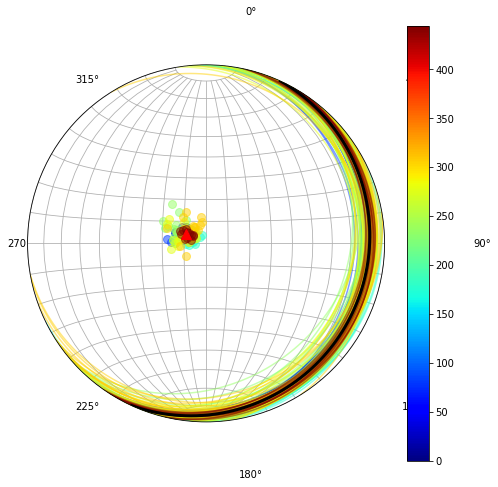

mean strike = 24.605663742527497 
mean dip direction = 114.6056637425275 
mean dip = 10.171934930519981


In [14]:
helix = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=ALL_planes.strat.max())
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=helix)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

ALL_mean_strike = (ALL_poles_mean['dec'] + 90.0)%360
ALL_mean_dip = 90.0 - ALL_poles_mean['inc']

for n in range(len(ALL_planes)):
    ax.plane(ALL_planes['strike'][n],ALL_planes['dip'][n], 
             c=scalarMap.to_rgba(ALL_planes['strat'][n]), linewidth=1.5, alpha=0.5)
    ax.pole(ALL_planes['strike'][n],ALL_planes['dip'][n], 
            c=scalarMap.to_rgba(ALL_planes['strat'][n]), markersize=8, alpha=0.5)
ax.plane(ALL_mean_strike,ALL_mean_dip, 'k-', linewidth=3)
ax.pole(ALL_mean_strike,ALL_mean_dip, 'r^', markersize=10)

# ax.plane(ALL_planes['strike'],ALL_planes['dip'], 'g-', linewidth=1.5)
# ax.pole(ALL_planes['strike'],ALL_planes['dip'], 'bo', markersize=8)
# ax.plane(ALL_mean_strike,ALL_mean_dip, 'r-', linewidth=3)
# ax.pole(ALL_mean_strike,ALL_mean_dip, 'r^', markersize=15)
ax.grid()
scalarMap._A = []
plt.colorbar(scalarMap)
plt.show()
print ('mean strike =', ALL_mean_strike,'\nmean dip direction =',ALL_mean_strike+90,'\nmean dip =', ALL_mean_dip)

# Measurements binned by stratigraphic height

In [15]:
results = pd.DataFrame(columns=['common mean with neighbor strat', 'common mean with grand mean'])

In [17]:
def tilt_by_strat(num_bins):
    max_strat = int(ALL_planes.strat.max())
    division = num_bins
    increment = int(ALL_planes.strat.max()/division)
    df_list = []
    for n in range(0, max_strat+increment, increment):
        df = ALL_planes.ix[ALL_planes['strat']>=n].ix[ALL_planes['strat']<=n+increment]
        df.reset_index(inplace=True)
        if len(df)!=0:
            df_list.append(df)

    helix = cm = plt.get_cmap('jet') 
    cNorm  = colors.Normalize(vmin=0, vmax=len(df_list))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=helix)

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='stereonet')
    plt.figure(num=2, figsize=(6,6))
    ipmag.plot_net(2)
    j=0
    dec_list = []
    inc_list = []
    for dataset in df_list:
        colorVal = scalarMap.to_rgba(j)
        mean_pole = calc_pole_mean(dataset)
        dec_list.append(mean_pole['dec'])
        inc_list.append(mean_pole['inc'])
        mean_strike = (mean_pole['dec'] + 90.0)%360
        mean_dip = 90.0 - mean_pole['inc']
    #     ax.plane(dataset['strike'],dataset['dip'], linewidth=1.5)
    #     ax.pole(dataset['strike'],dataset['dip'], markersize=8)
        rand_color = np.random.rand(3)
        ax.plane(mean_strike,mean_dip, linewidth=3, c=colorVal, label='{0} to {1} meters; mean = {2:03d}/{3:02d}'.format(dataset.strat.min(),dataset.strat.max(),int(mean_strike),int(mean_dip)))
        ax.pole(mean_strike,mean_dip, c=colorVal, markersize=3)
    #     ax.plot(Xcirc,Ycirc,c=colorVal)
    #     ipmag.plot_di(di_block=ipmag.make_di_block(dataset.pole_trend, dataset.pole_plunge),color=colorVal)
        ipmag.plot_di_mean(mean_pole['dec'], mean_pole['inc'], mean_pole['alpha95'],color=colorVal)
        j+=1
    ipmag.plot_di_mean(ALL_poles_mean['dec'], ALL_poles_mean['inc'], 
                   ALL_poles_mean['alpha95'], marker='s', color='r')
    grand_mean = pmag.fisher_mean(ipmag.make_di_block(dec_list, inc_list))
    grand_mean_strike = (grand_mean['dec'] + 90)%360
    grand_mean_dip = 90.0 - grand_mean['inc']
    ax.grid()
    ax.legend(loc='upper left', title='Grand mean = {0:03d}/{1:2d}'.format(int(grand_mean_strike), int(grand_mean_dip)))
    # plt.savefig('division{0}_plots.pdf'.format(division))
    plt.show()

    for n in range(len(df_list)):
        print ('\n\nTest for common mean with neighboring stratigraphic bin:\n\n')
        ipmag.common_mean_bootstrap(ipmag.make_di_block(df_list[n].pole_trend, df_list[n].pole_plunge), 
                                    ipmag.make_di_block(df_list[n-1].pole_trend, df_list[n-1].pole_plunge))
        ipmag.common_mean_watson(ipmag.make_di_block(df_list[n].pole_trend, df_list[n].pole_plunge), 
                                    ipmag.make_di_block(df_list[n-1].pole_trend, df_list[n-1].pole_plunge))
        print ('\n\nTest for common mean with mean of all combined measurements:\n\n')
        ipmag.common_mean_bootstrap(ipmag.make_di_block(df_list[n].pole_trend, df_list[n].pole_plunge), 
                                    ipmag.make_di_block(ALL_planes['pole_trend'].tolist(),ALL_planes['pole_plunge'].tolist()))
        ipmag.common_mean_watson(ipmag.make_di_block(df_list[n].pole_trend, df_list[n].pole_plunge), 
                                    ipmag.make_di_block(ALL_planes['pole_trend'].tolist(),ALL_planes['pole_plunge'].tolist()))
    # test for common mean between grand mean (calculated from means binned by stratigraphic height) and mean from all measurements
    print ('\n\nTesting for common mean between mean of all measurements:\n\n', ALL_poles_mean, '\n\nand grand mean of binned measurements:\n\n', grand_mean)
    
    ipmag.common_mean_bootstrap(ipmag.make_di_block(ALL_planes['pole_trend'].tolist(),ALL_planes['pole_plunge'].tolist()), 
                                ipmag.make_di_block(dec_list, inc_list))
    ipmag.common_mean_watson(ipmag.make_di_block(ALL_planes['pole_trend'].tolist(),ALL_planes['pole_plunge'].tolist()), 
                                ipmag.make_di_block(dec_list, inc_list))
    # plt.savefig('division{0}_common_mean.pdf'.format(division))
    plt.show()

In [18]:
ipmag.common_mean_watson(ipmag.make_di_block(ALL_planes['pole_trend'].tolist(),ALL_planes['pole_plunge'].tolist()), 
                                ipmag.make_di_block(dec_list, inc_list))

NameError: name 'dec_list' is not defined

In [19]:
_

['GB3',
 'GB4',
 'GB6',
 'GB7',
 'GB9',
 'GB10',
 'GB11',
 'GB12',
 'GB13',
 'GB14',
 'GB15',
 'GB21',
 'GB22',
 'GB23',
 'GB28',
 'GB32']

In [20]:
stout

NameError: name 'stout' is not defined

In [21]:
str(watson).split('\n')[4][1:5]

NameError: name 'watson' is not defined

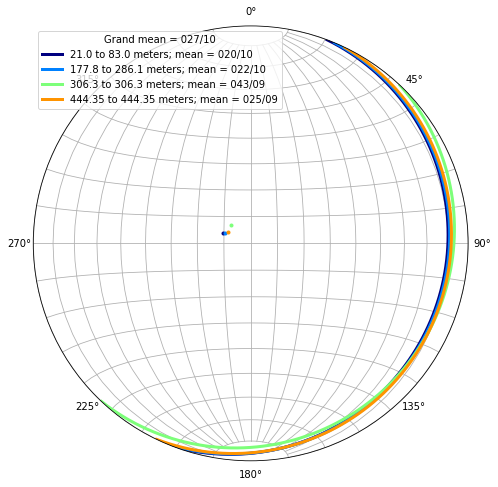

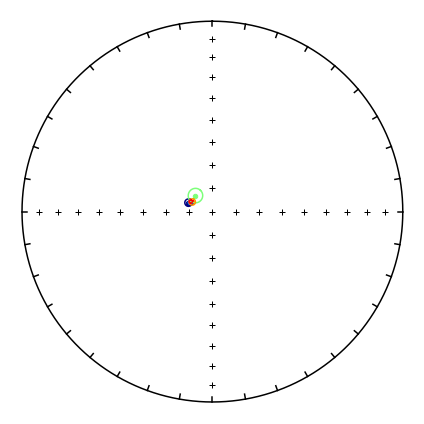



Test for common mean with neighboring stratigraphic bin:




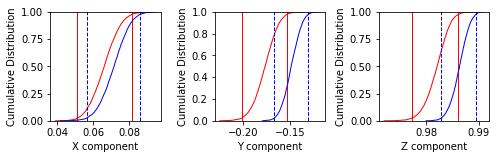

Results of Watson V test: 

Watson's V:           4.3
Critical value of V:  6.1
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 1.7
Critical angle for M&M1990:   2.0
The McFadden and McElhinny (1990) classification for
this test is: 'A'


Test for common mean with mean of all combined measurements:




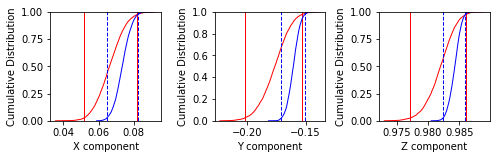

Results of Watson V test: 

Watson's V:           2.3
Critical value of V:  6.4
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 1.0
Critical angle for M&M1990:   1.7
The McFadden and McElhinny (1990) classification for
this test is: 'A'


Test for common mean with neighboring stratigraphic bin:




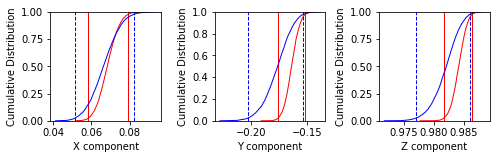

Results of Watson V test: 

Watson's V:           1.2
Critical value of V:  6.3
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 0.8
Critical angle for M&M1990:   1.8
The McFadden and McElhinny (1990) classification for
this test is: 'A'


Test for common mean with mean of all combined measurements:




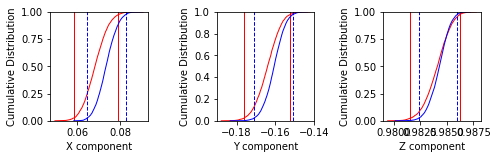

Results of Watson V test: 

Watson's V:           0.7
Critical value of V:  6.1
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 0.4
Critical angle for M&M1990:   1.1
The McFadden and McElhinny (1990) classification for
this test is: 'A'


Test for common mean with neighboring stratigraphic bin:




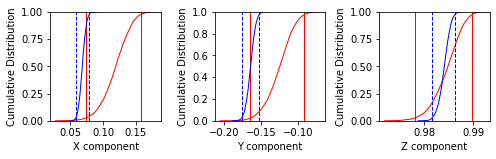

Results of Watson V test: 

Watson's V:           8.6
Critical value of V:  6.6
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 3.6
Critical angle for M&M1990:   3.2



Test for common mean with mean of all combined measurements:




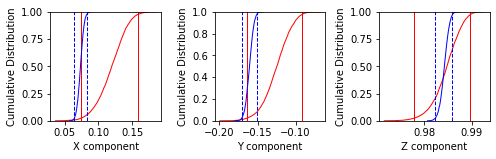

Results of Watson V test: 

Watson's V:           7.1
Critical value of V:  6.5
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 3.3
Critical angle for M&M1990:   3.1



Test for common mean with neighboring stratigraphic bin:




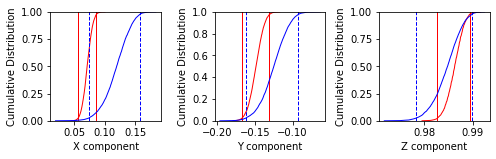

Results of Watson V test: 

Watson's V:           5.4
Critical value of V:  6.3
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 3.0
Critical angle for M&M1990:   3.2
The McFadden and McElhinny (1990) classification for
this test is: 'A'


Test for common mean with mean of all combined measurements:




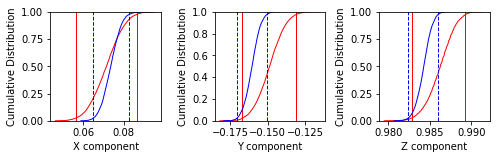

Results of Watson V test: 

Watson's V:           1.4
Critical value of V:  6.5
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 0.7
Critical angle for M&M1990:   1.5
The McFadden and McElhinny (1990) classification for
this test is: 'A'


Testing for common mean between mean of all measurements:

 {'dec': 294.6056637425275, 'inc': 79.82806506948002, 'n': 146, 'r': 145.50022551120014, 'k': 290.13085551485085, 'alpha95': 0.6861355934169822, 'csd': 4.755411016730359} 

and grand mean of binned measurements:

 {'dec': 297.825521159069, 'inc': 79.98443990604437, 'n': 4, 'r': 3.9983284062957742, 'k': 1794.6944837229596, 'alpha95': 2.169441862746859, 'csd': 1.9120082194231636}


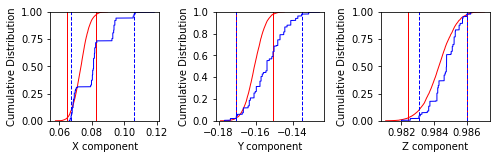

Results of Watson V test: 

Watson's V:           0.6
Critical value of V:  8.6
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 0.6
Critical angle for M&M1990:   2.2
The McFadden and McElhinny (1990) classification for
this test is: 'A'


In [22]:
tilt_by_strat(3)

## Stratigraphic division = 5

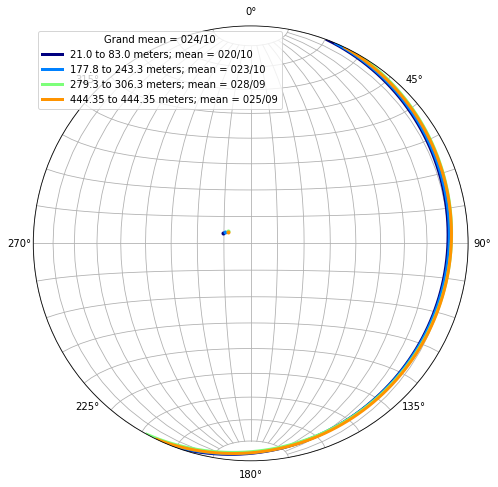

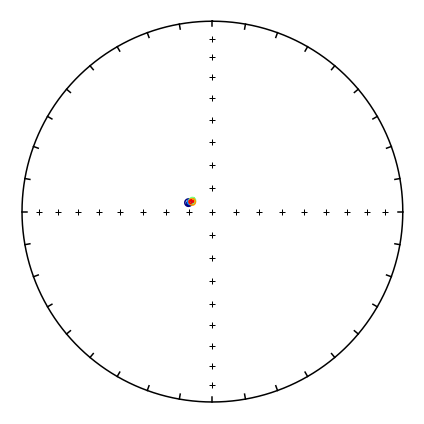



Test for common mean with neighboring stratigraphic bin:




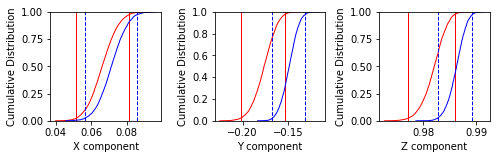

Results of Watson V test: 

Watson's V:           4.3
Critical value of V:  6.2
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 1.7
Critical angle for M&M1990:   2.0
The McFadden and McElhinny (1990) classification for
this test is: 'A'


Test for common mean with mean of all combined measurements:




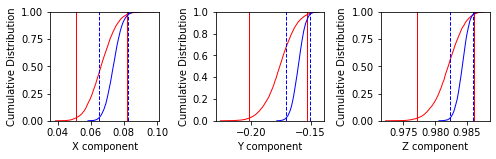

Results of Watson V test: 

Watson's V:           2.3
Critical value of V:  6.4
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 1.0
Critical angle for M&M1990:   1.7
The McFadden and McElhinny (1990) classification for
this test is: 'A'


Test for common mean with neighboring stratigraphic bin:




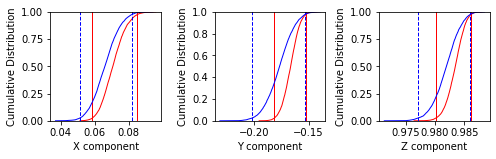

Results of Watson V test: 

Watson's V:           0.7
Critical value of V:  6.3
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 0.6
Critical angle for M&M1990:   1.9
The McFadden and McElhinny (1990) classification for
this test is: 'A'


Test for common mean with mean of all combined measurements:




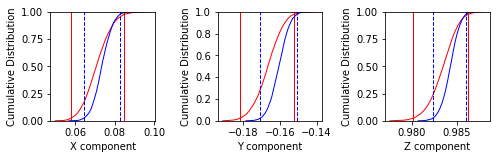

KeyboardInterrupt: 

In [23]:
tilt_by_strat(5)

## Stratigraphic division = 8

In [ ]:
tilt_by_strat(8)

## Stratigraphic division = 10

In [ ]:
tilt_by_strat(10)

## Stratigraphic division = 15

In [ ]:
tilt_by_strat(15)

## Stratigraphic division = 20

In [ ]:
tilt_by_strat(20)

In [ ]:
plt.figure(1)
ipmag.plot_net(1)
ipmag.plot_di(ALL_planes.ix[ALL_planes['strat']==177.8]['pole_trend'].tolist(), 
              ALL_planes.ix[ALL_planes['strat']==177.8]['pole_plunge'].tolist())
fish_mean = pmag.fisher_mean(ipmag.make_di_block(ALL_planes.ix[ALL_planes['strat']==177.8]['pole_trend'].tolist(), 
              ALL_planes.ix[ALL_planes['strat']==177.8]['pole_plunge'].tolist()))
ipmag.plot_di_mean(fish_mean['dec'], fish_mean['inc'], fish_mean['alpha95'], color='r', marker='s')
plt.show()

In [ ]:
GB_lowerthird = ALL_planes.ix[ALL_planes.strat<150]
GB_upperthird = ALL_planes.ix[ALL_planes.strat>300]
GB_upperthird

In [ ]:


helix = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=len(df_list))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=helix)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
plt.figure(num=2, figsize=(6,6))
ipmag.plot_net(2)
j=0
dec_list = []
inc_list = []

colorVal = scalarMap.to_rgba(j)
mean_pole = calc_pole_mean(GB_lowerthird)
dec_list.append(mean_pole['dec'])
inc_list.append(mean_pole['inc'])
mean_strike = (mean_pole['dec'] + 90.0)%360
mean_dip = 90.0 - mean_pole['inc']
#     ax.plane(dataset['strike'],dataset['dip'], linewidth=1.5)
#     ax.pole(dataset['strike'],dataset['dip'], markersize=8)
rand_color = np.random.rand(3)
ax.plane(mean_strike,mean_dip, linewidth=3, c=colorVal, label='{0} to {1} meters; mean = {2:03d}/{3:02d}'.format(dataset.strat.min(),dataset.strat.max(),int(mean_strike),int(mean_dip)))
ax.pole(mean_strike,mean_dip, c=colorVal, markersize=3)
#     ax.plot(Xcirc,Ycirc,c=colorVal)
#     ipmag.plot_di(di_block=ipmag.make_di_block(dataset.pole_trend, dataset.pole_plunge),color=colorVal)
ipmag.plot_di_mean(mean_pole['dec'], mean_pole['inc'], mean_pole['alpha95'],color=colorVal)
#j+=1
#ipmag.plot_di_mean(ALL_poles_mean['dec'], ALL_poles_mean['inc'], 
#           ALL_poles_mean['alpha95'], marker='s', color='r')

colorVal = scalarMap.to_rgba(j+1)
mean_pole = calc_pole_mean(GB_upperthird)
dec_list.append(mean_pole['dec'])
inc_list.append(mean_pole['inc'])
mean_strike = (mean_pole['dec'] + 90.0)%360
mean_dip = 90.0 - mean_pole['inc']
#     ax.plane(dataset['strike'],dataset['dip'], linewidth=1.5)
#     ax.pole(dataset['strike'],dataset['dip'], markersize=8)
rand_color = np.random.rand(3)
ax.plane(mean_strike,mean_dip, linewidth=3, c=colorVal, label='{0} to {1} meters; mean = {2:03d}/{3:02d}'.format(dataset.strat.min(),dataset.strat.max(),int(mean_strike),int(mean_dip)))
ax.pole(mean_strike,mean_dip, c=colorVal, markersize=3)
#     ax.plot(Xcirc,Ycirc,c=colorVal)
#     ipmag.plot_di(di_block=ipmag.make_di_block(dataset.pole_trend, dataset.pole_plunge),color=colorVal)
ipmag.plot_di_mean(mean_pole['dec'], mean_pole['inc'], mean_pole['alpha95'],color=colorVal)

# for dataset in df_list:
#     colorVal = scalarMap.to_rgba(j)
#     mean_pole = calc_pole_mean(dataset)
#     dec_list.append(mean_pole['dec'])
#     inc_list.append(mean_pole['inc'])
#     mean_strike = (mean_pole['dec'] + 90.0)%360
#     mean_dip = 90.0 - mean_pole['inc']
# #     ax.plane(dataset['strike'],dataset['dip'], linewidth=1.5)
# #     ax.pole(dataset['strike'],dataset['dip'], markersize=8)
#     rand_color = np.random.rand(3)
#     ax.plane(mean_strike,mean_dip, linewidth=3, c=colorVal, label='{0} to {1} meters; mean = {2:03d}/{3:02d}'.format(dataset.strat.min(),dataset.strat.max(),int(mean_strike),int(mean_dip)))
#     ax.pole(mean_strike,mean_dip, c=colorVal, markersize=3)
# #     ax.plot(Xcirc,Ycirc,c=colorVal)
# #     ipmag.plot_di(di_block=ipmag.make_di_block(dataset.pole_trend, dataset.pole_plunge),color=colorVal)
#     ipmag.plot_di_mean(mean_pole['dec'], mean_pole['inc'], mean_pole['alpha95'],color=colorVal)
#     j+=1
# ipmag.plot_di_mean(ALL_poles_mean['dec'], ALL_poles_mean['inc'], 
#                ALL_poles_mean['alpha95'], marker='s', color='r')
# grand_mean = pmag.fisher_mean(ipmag.make_di_block(dec_list, inc_list))
# grand_mean_strike = (grand_mean['dec'] + 90)%360
# grand_mean_dip = 90.0 - grand_mean['inc']
# ax.grid()
# ax.legend(loc='upper left', title='Grand mean = {0:03d}/{1:2d}'.format(int(grand_mean_strike), int(grand_mean_dip)))
# # plt.savefig('division{0}_plots.pdf'.format(division))
# plt.show()

# for n in range(len(df_list)):
#     print '\n\nTest for common mean with neighboring stratigraphic bin:\n\n'
#     ipmag.common_mean_bootstrap(ipmag.make_di_block(df_list[n].pole_trend, df_list[n].pole_plunge), 
#                                 ipmag.make_di_block(df_list[n-1].pole_trend, df_list[n-1].pole_plunge))
#     ipmag.common_mean_watson(ipmag.make_di_block(df_list[n].pole_trend, df_list[n].pole_plunge), 
#                                 ipmag.make_di_block(df_list[n-1].pole_trend, df_list[n-1].pole_plunge))
#     print '\n\nTest for common mean with mean of all combined measurements:\n\n'
#     ipmag.common_mean_bootstrap(ipmag.make_di_block(df_list[n].pole_trend, df_list[n].pole_plunge), 
#                                 ipmag.make_di_block(ALL_planes['pole_trend'].tolist(),ALL_planes['pole_plunge'].tolist()))
#     ipmag.common_mean_watson(ipmag.make_di_block(df_list[n].pole_trend, df_list[n].pole_plunge), 
#                                 ipmag.make_di_block(ALL_planes['pole_trend'].tolist(),ALL_planes['pole_plunge'].tolist()))
# # test for common mean between grand mean (calculated from means binned by stratigraphic height) and mean from all measurements
# print '\n\nTesting for common mean between mean of all measurements:\n\n', ALL_poles_mean, '\n\nand grand mean of binned measurements:\n\n', grand_mean

# ipmag.common_mean_bootstrap(ipmag.make_di_block(ALL_planes['pole_trend'].tolist(),ALL_planes['pole_plunge'].tolist()), 
#                             ipmag.make_di_block(dec_list, inc_list))
# ipmag.common_mean_watson(ipmag.make_di_block(ALL_planes['pole_trend'].tolist(),ALL_planes['pole_plunge'].tolist()), 
#                             ipmag.make_di_block(dec_list, inc_list))
# # plt.savefig('division{0}_common_mean.pdf'.format(division))
# plt.show()